In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("F:/JARS CDD/Archivo_Sucio_Car_Prices")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [3]:
df2 = pd.read_csv("F:/JARS CDD/Base_Limpia_Car_Prices.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556971 entries, 0 to 556970
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   año            556971 non-null  int64  
 1   marca          548510 non-null  object 
 2   modelo         548412 non-null  object 
 3   trim           548160 non-null  object 
 4   carroceria     545616 non-null  object 
 5   transmision    493380 non-null  object 
 6   ID del auto    556971 non-null  object 
 7   estado         556971 non-null  object 
 8   condicion      545264 non-null  float64
 9   kilometraje    548412 non-null  float64
 10  color          556237 non-null  object 
 11  interior       556237 non-null  object 
 12  seller         556971 non-null  object 
 13  mmr            548412 non-null  float64
 14  precio_venta   548412 non-null  float64
 15  fecha_venta    556959 non-null  object 
 16  transmision.1  493380 non-null  object 
dtypes: float64(4), int64(1), obje

In [4]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="mako")

In [5]:
df=df2

In [ ]:
plt.rcParams["figure.figsize"] = (10, 4)  
plt.rcParams["font.size"] = 10

In [ ]:
print(df.shape)  
display(df.describe().T.style.background_gradient(cmap='mako'))

(556971, 17)


,count,mean,std,min,25%,50%,75%,max
año,556971.000000,2010.047586,3.958199,1982.000000,2007.000000,2012.000000,2013.000000,2015.000000
condicion,545264.000000,30.685948,13.393086,1.000000,23.000000,35.000000,42.000000,49.000000
kilometraje,548412.000000,67540.476943,52906.021144,1.000000,28148.000000,51414.000000,97925.000000,999999.000000
mmr,548412.000000,13848.771954,9630.422324,25.000000,7275.000000,12350.000000,18400.000000,182000.000000
precio_venta,548412.000000,13689.232464,9701.861218,1.000000,7000.000000,12200.000000,18300.000000,230000.000000


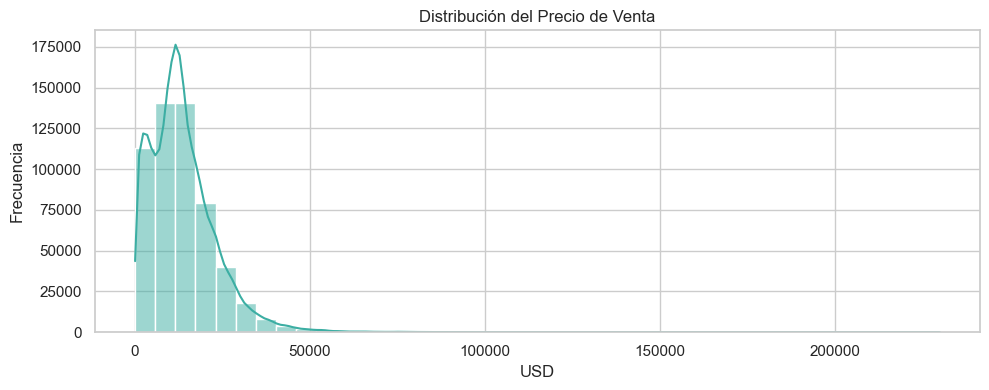

In [8]:
plt.figure()
sns.histplot(df['precio_venta'], bins=40, kde=True, color='#3caea3')
plt.title('Distribución del Precio de Venta')
plt.xlabel('USD'); plt.ylabel('Frecuencia'); plt.tight_layout(); plt.show()

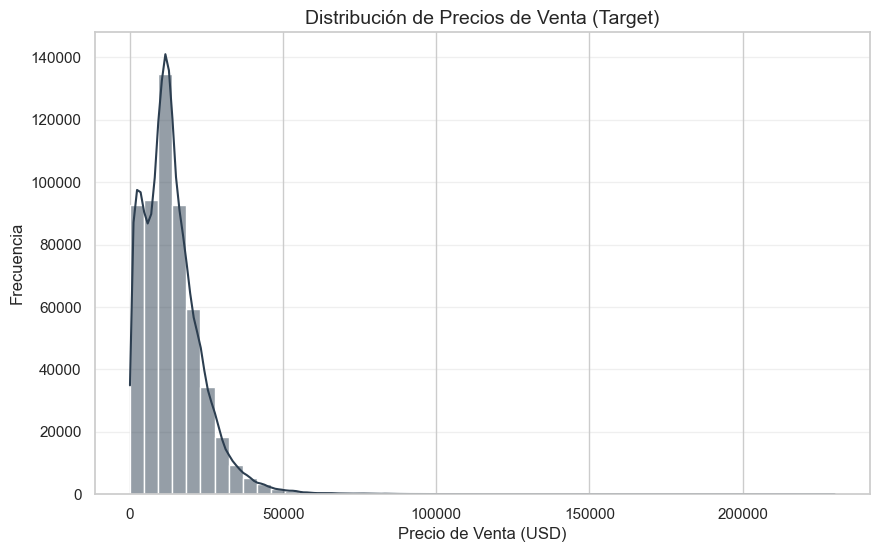

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['precio_venta'], bins=50, kde=True, color='#2c3e50')
plt.title('Distribución de Precios de Venta (Target)', fontsize=14)
plt.xlabel('Precio de Venta (USD)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()

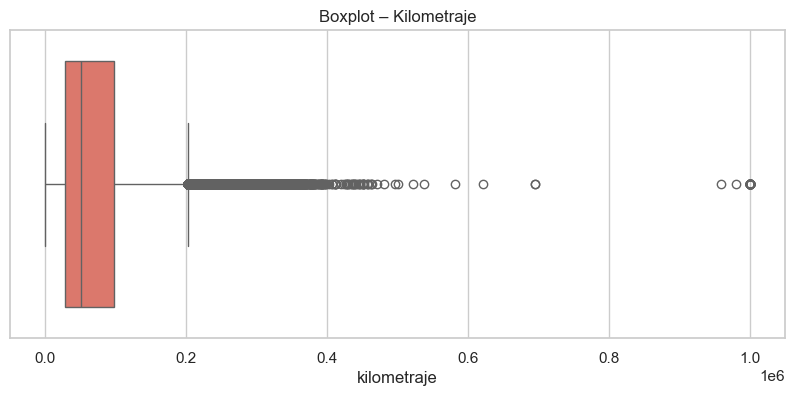

In [10]:
plt.figure()
sns.boxplot(x=df['kilometraje'], color='#ed6a5a')
plt.title('Boxplot – Kilometraje'); plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2264\1408600457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='mako')


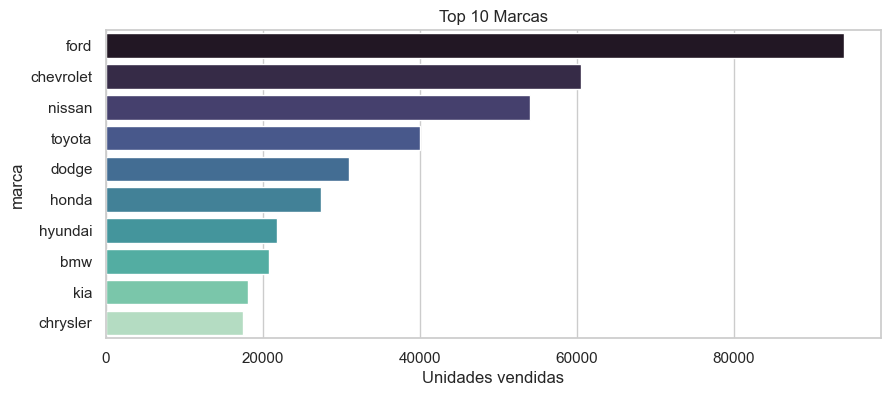

In [11]:
top10 = df['marca'].value_counts().head(10)
plt.figure()
sns.barplot(x=top10.values, y=top10.index, palette='mako')
plt.title('Top 10 Marcas'); plt.xlabel('Unidades vendidas'); plt.show()

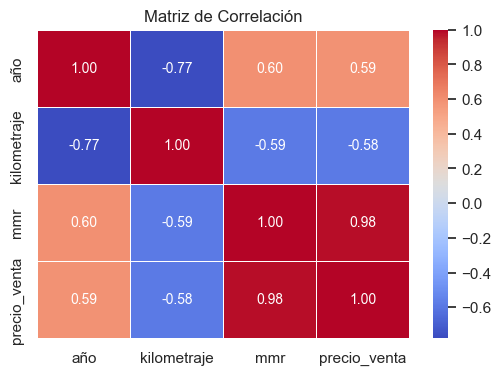

In [12]:
num_cols = ['año', 'kilometraje', 'mmr', 'precio_venta']
corr = df[num_cols].corr(method='pearson')
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación'); plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2264\3575157165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='carroceria', y='precio_venta', data=df, palette='mako')


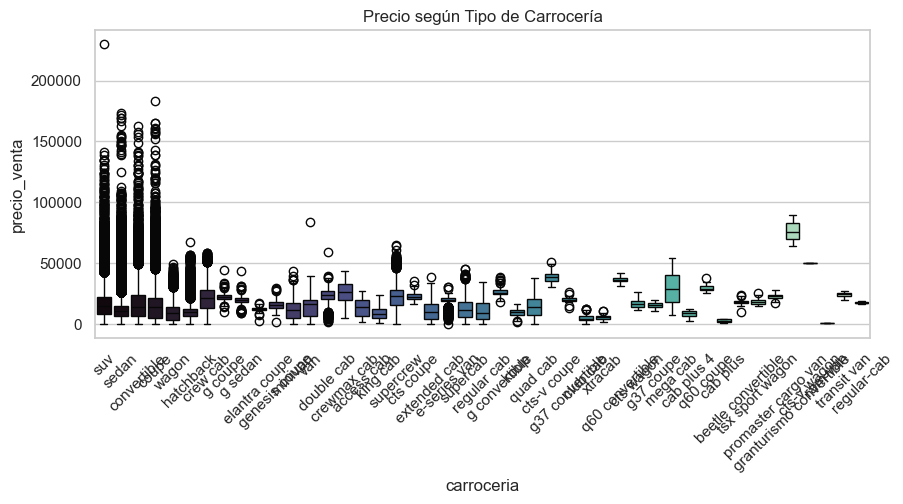

In [13]:
plt.figure()
sns.boxplot(x='carroceria', y='precio_venta', data=df, palette='mako')
plt.xticks(rotation=45); plt.title('Precio según Tipo de Carrocería'); plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2264\118642465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='transmision', y='margen', data=df, palette='mako')


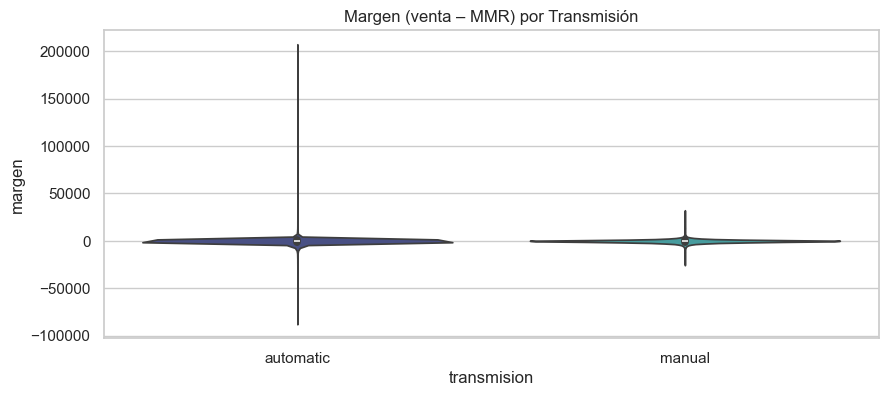

In [14]:
df['margen'] = df['precio_venta'] - df['mmr']
plt.figure()
sns.violinplot(x='transmision', y='margen', data=df, palette='mako')
plt.title('Margen (venta – MMR) por Transmisión'); plt.show()

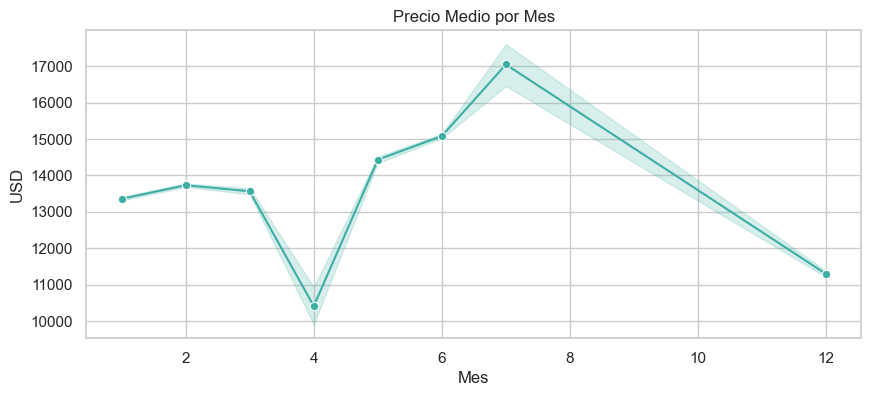

In [15]:
df['mes'] = pd.to_datetime(df['fecha_venta']).dt.month
plt.figure()
sns.lineplot(x='mes', y='precio_venta', data=df, estimator='mean', color='#3caea3', marker='o')
plt.title('Precio Medio por Mes'); plt.xlabel('Mes'); plt.ylabel('USD'); plt.show()

In [ ]:
Q1, Q3 = df['precio_venta'].quantile([0.25, 0.75])
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
print(f'Outliers precio: {((df.precio_venta < low) | (df.precio_venta > high)).sum()} registros')

Outliers precio: 15626 registros


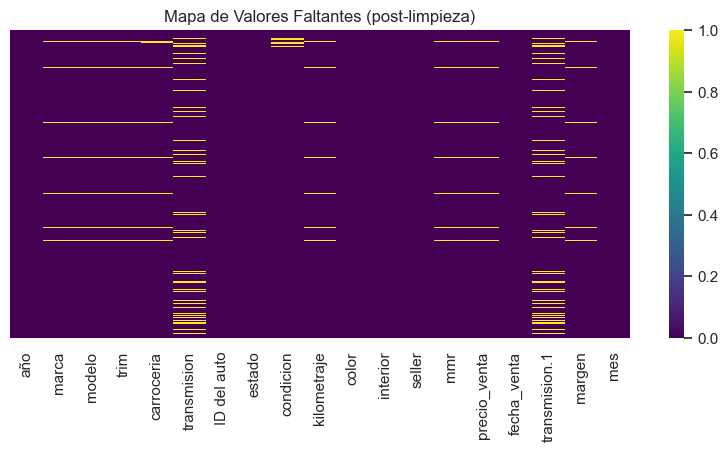

In [17]:
plt.figure()
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes (post-limpieza)'); plt.show()

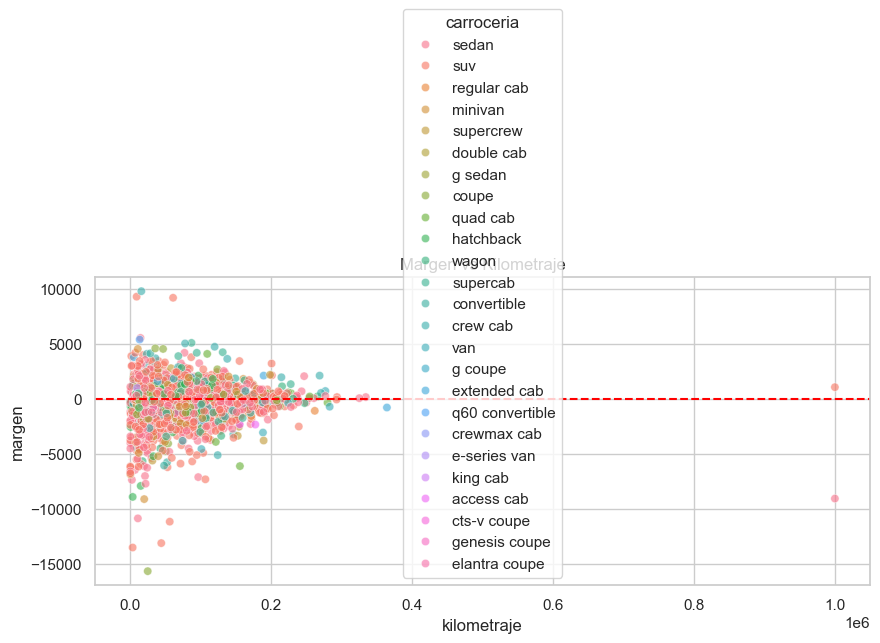

In [18]:
plt.figure()
sns.scatterplot(x='kilometraje', y='margen', hue='carroceria', data=df.sample(3000), alpha=.6)
plt.axhline(0, color='red', ls='--'); plt.title('Margen vs Kilometraje'); plt.show()

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


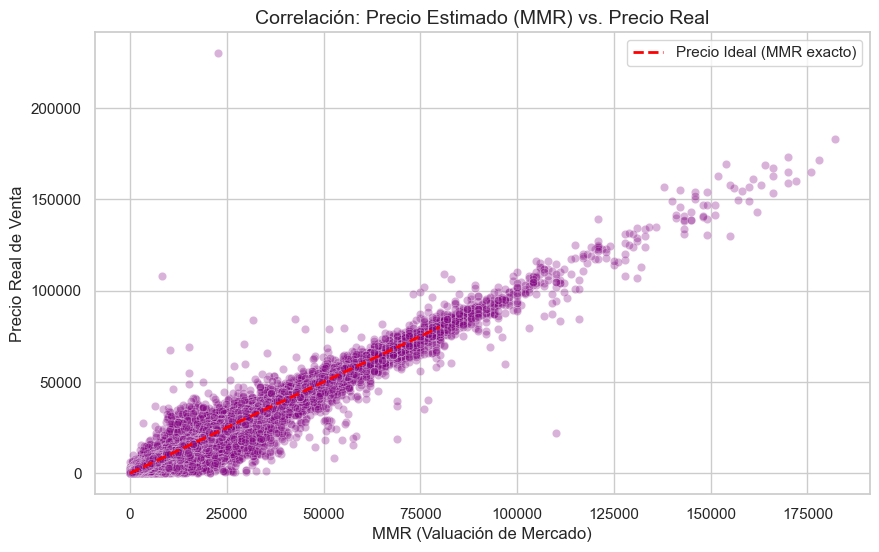

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mmr', y='precio_venta', data=df, alpha=0.3, color='purple')
plt.plot([0, 80000], [0, 80000], 'r--', linewidth=2, label='Precio Ideal (MMR exacto)')
plt.title('Correlación: Precio Estimado (MMR) vs. Precio Real', fontsize=14)
plt.xlabel('MMR (Valuación de Mercado)')
plt.ylabel('Precio Real de Venta')
plt.legend()
plt.show()

Datos listos para entrenar: 536705 registros
Entrenando modelo... (esto puede tardar unos segundos)
------------------------------------------------
✅ ENTRENAMIENTO EXITOSO
Error Promedio Absoluto (MAE): $997.58 USD
Precisión del Modelo (R2 Score): 0.9683
------------------------------------------------


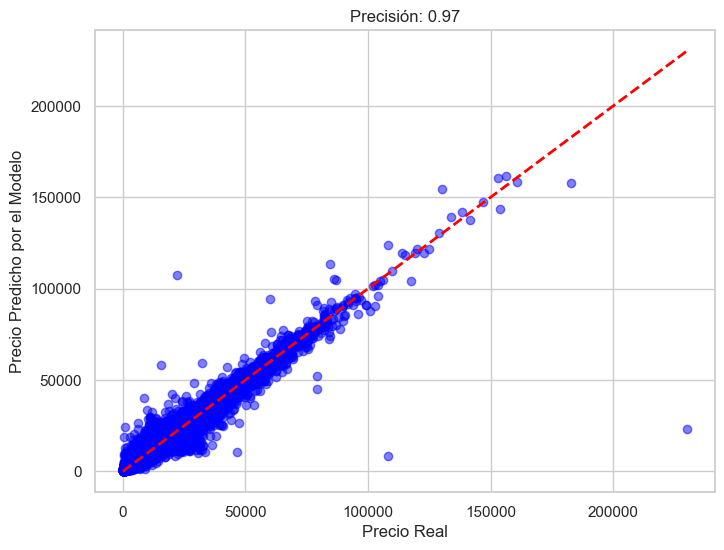

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_model = df.copy()

cols_numericas = ['año', 'condicion', 'kilometraje', 'mmr', 'precio_venta']
for col in cols_numericas:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

df_model = df_model.dropna(subset=cols_numericas + ['marca'])

print(f"Datos listos para entrenar: {df_model.shape[0]} registros")

le = LabelEncoder()
df_model['marca_encoded'] = le.fit_transform(df_model['marca'].astype(str))

features = ['año', 'marca_encoded', 'condicion', 'kilometraje', 'mmr']
target = 'precio_venta'

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Entrenando modelo... (esto puede tardar unos segundos)")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("------------------------------------------------")
print(f"✅ ENTRENAMIENTO EXITOSO")
print(f"Error Promedio Absoluto (MAE): ${mae:.2f} USD")
print(f"Precisión del Modelo (R2 Score): {r2:.4f}")
print("------------------------------------------------")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho por el Modelo')
plt.title(f'Precisión: {r2:.2f}')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2264\993741777.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[0, 1], data=df_model, x='marca', order=top_marcas, palette='viridis')


KeyboardInterrupt: 

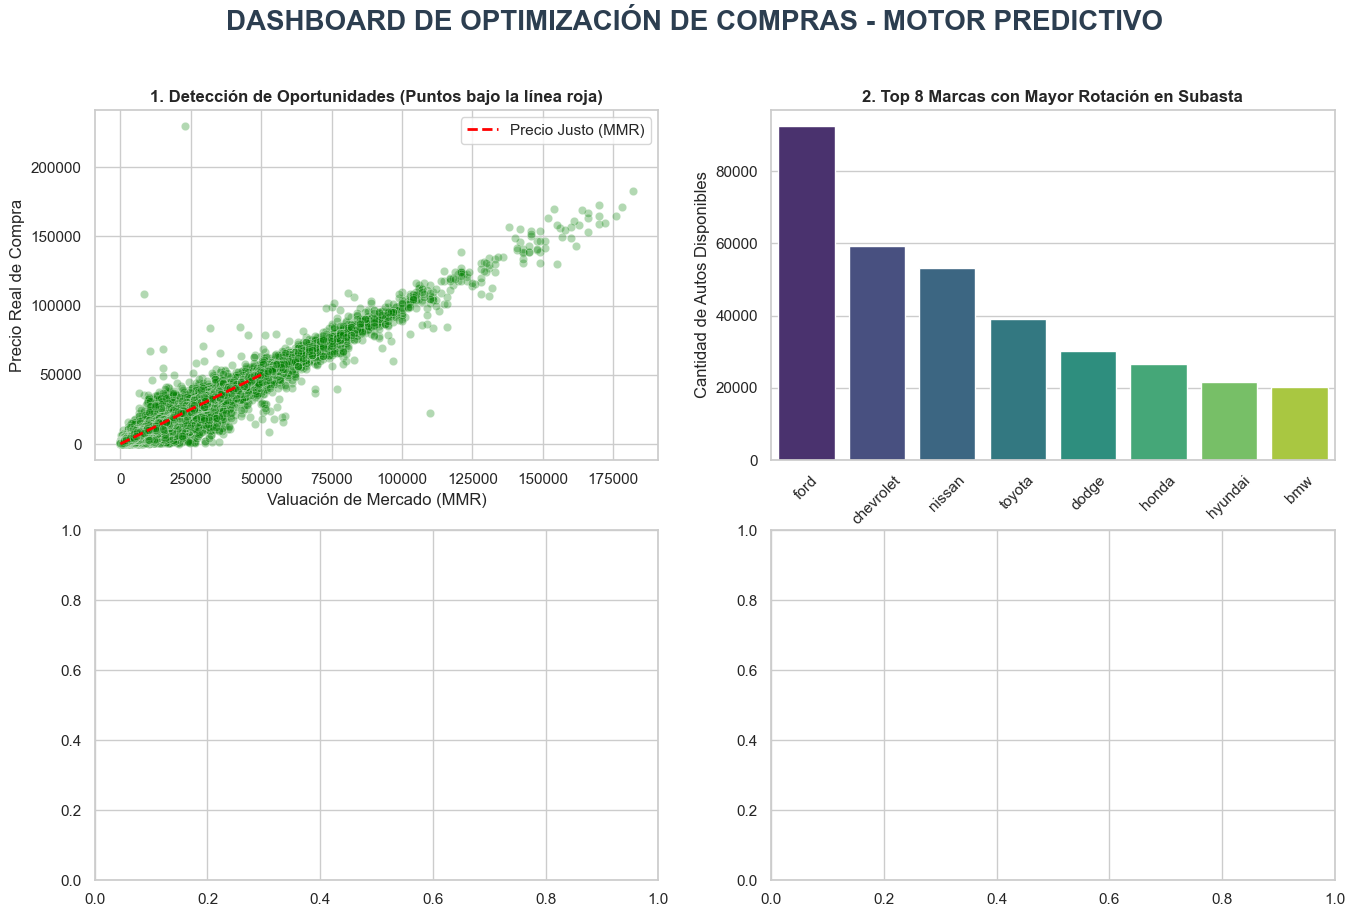

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

plt.suptitle('DASHBOARD DE OPTIMIZACIÓN DE COMPRAS - MOTOR PREDICTIVO', fontsize=20, weight='bold', color='#2c3e50')

sns.scatterplot(ax=axs[0, 0], x=df_model['mmr'], y=df_model['precio_venta'], alpha=0.3, color='green')
axs[0, 0].plot([0, 50000], [0, 50000], 'r--', linewidth=2, label='Precio Justo (MMR)')
axs[0, 0].set_title('1. Detección de Oportunidades (Puntos bajo la línea roja)', fontsize=12, weight='bold')
axs[0, 0].set_xlabel('Valuación de Mercado (MMR)')
axs[0, 0].set_ylabel('Precio Real de Compra')
axs[0, 0].legend()

top_marcas = df_model['marca'].value_counts().head(8).index
sns.countplot(ax=axs[0, 1], data=df_model, x='marca', order=top_marcas, palette='viridis')
axs[0, 1].set_title('2. Top 8 Marcas con Mayor Rotación en Subasta', fontsize=12, weight='bold')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Cantidad de Autos Disponibles')

sns.lineplot(ax=axs[1, 0], x=df_model['kilometraje'], y=df_model['precio_venta'], color='#e74c3c')
axs[1, 0].set_title('3. Curva de Depreciación por Uso', fontsize=12, weight='bold')
axs[1, 0].set_xlabel('Kilometraje')
axs[1, 0].set_ylabel('Precio Promedio')
axs[1, 0].set_xlim(0, 200000) 
axs[1, 1].scatter(y_test, y_pred, alpha=0.5, color='#2980b9')
axs[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
axs[1, 1].set_title(f'4. Validación del Modelo (Precisión: {r2*100:.1f}%)', fontsize=12, weight='bold')
axs[1, 1].set_xlabel('Precio Real')
axs[1, 1].set_ylabel('Precio Calculado por IA')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2264\3839400793.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axs[0, 1], data=df_model, x='marca', order=top_marcas, palette='viridis')


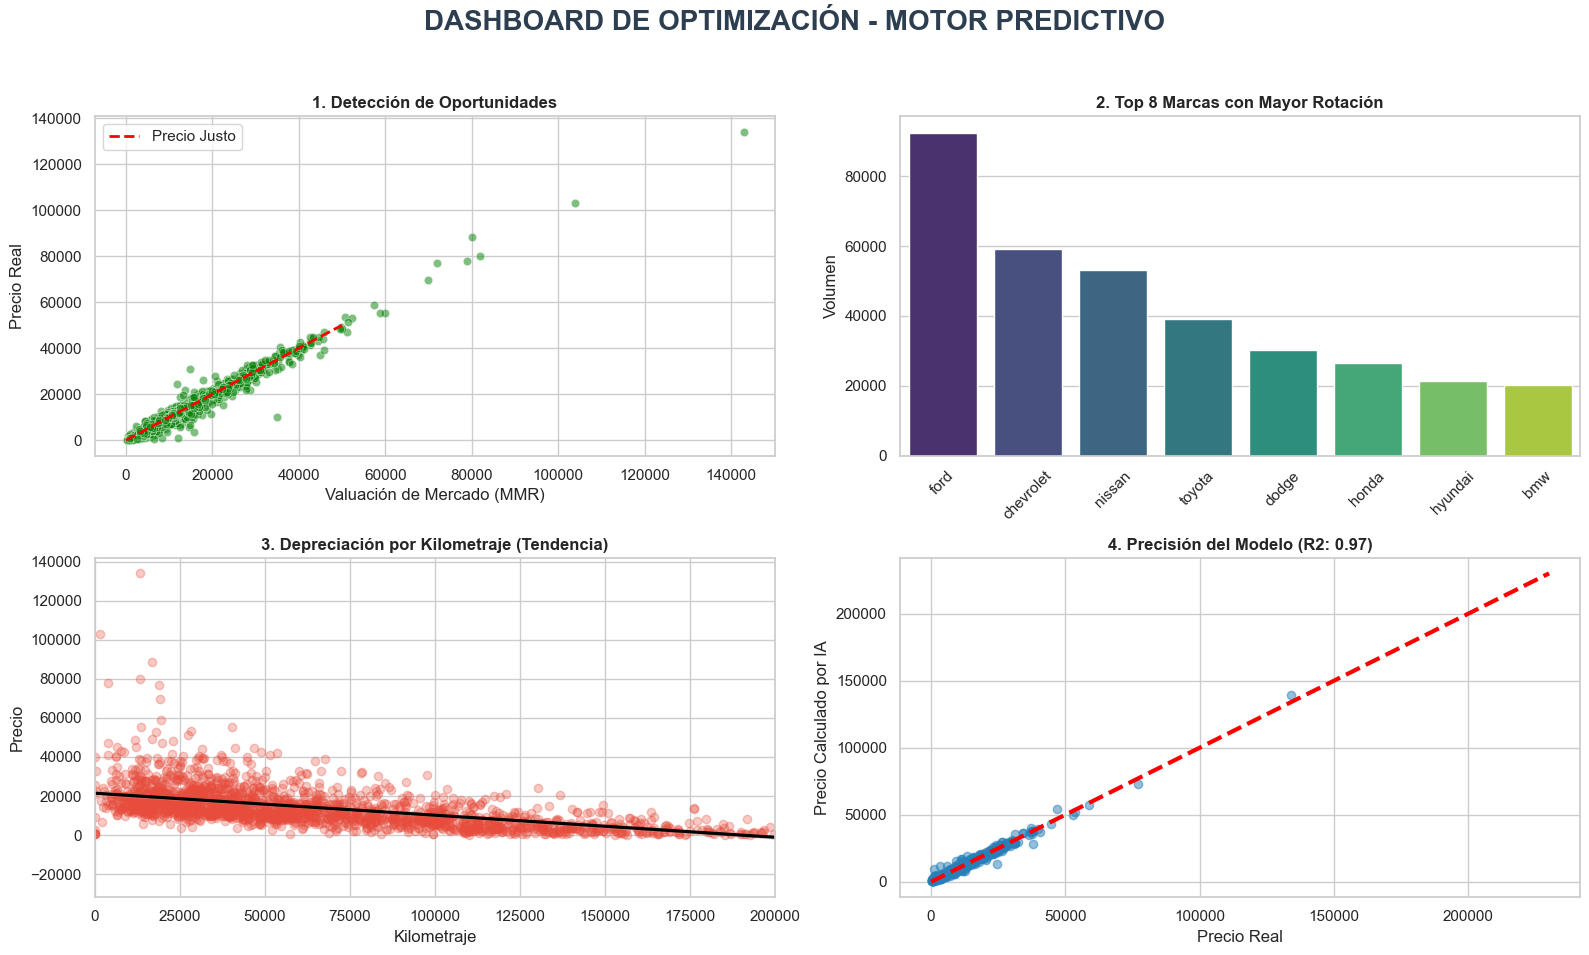

In [23]:
# --- CÓDIGO DASHBOARD VERSIÓN RÁPIDA (OPTIMIZADA) ---
import matplotlib.pyplot as plt
import seaborn as sns

# TRUCO: Tomamos solo una muestra de 2000 datos para que grafique AL INSTANTE
# (Visualmente se ve igual, pero no congela tu PC)
if len(df_model) > 2000:
    df_viz = df_model.sample(2000, random_state=42)
else:
    df_viz = df_model.copy()

# Configuración de estilo
sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Título General
plt.suptitle('DASHBOARD DE OPTIMIZACIÓN - MOTOR PREDICTIVO', fontsize=20, weight='bold', color='#2c3e50')

# GRÁFICA 1: OPORTUNIDADES (Scatterplot ligero)
sns.scatterplot(ax=axs[0, 0], x=df_viz['mmr'], y=df_viz['precio_venta'], alpha=0.5, color='green')
axs[0, 0].plot([0, 50000], [0, 50000], 'r--', linewidth=2, label='Precio Justo')
axs[0, 0].set_title('1. Detección de Oportunidades', fontsize=12, weight='bold')
axs[0, 0].set_xlabel('Valuación de Mercado (MMR)')
axs[0, 0].set_ylabel('Precio Real')
axs[0, 0].legend()

# GRÁFICA 2: MARCAS (Esta es rápida, usamos todos los datos para que el conteo sea real)
top_marcas = df_model['marca'].value_counts().head(8).index
sns.countplot(ax=axs[0, 1], data=df_model, x='marca', order=top_marcas, palette='viridis')
axs[0, 1].set_title('2. Top 8 Marcas con Mayor Rotación', fontsize=12, weight='bold')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Volumen')

# GRÁFICA 3: KILOMETRAJE (El problema anterior)
# SOLUCIÓN: Usamos scatter en vez de lineplot pesado, o lineplot sin errorbar
sns.regplot(ax=axs[1, 0], x='kilometraje', y='precio_venta', data=df_viz, 
            scatter_kws={'alpha':0.3, 'color':'#e74c3c'}, line_kws={'color':'black'})
axs[1, 0].set_title('3. Depreciación por Kilometraje (Tendencia)', fontsize=12, weight='bold')
axs[1, 0].set_xlabel('Kilometraje')
axs[1, 0].set_ylabel('Precio')
axs[1, 0].set_xlim(0, 200000)

# GRÁFICA 4: VALIDACIÓN (Usamos una muestra de las predicciones)
# Tomamos una muestra proporcional de y_test y y_pred para graficar rápido
indices_viz = df_viz.index.intersection(y_test.index) # Asegurar coincidencia
# Si es complicado alinear índices, simplemente graficamos los primeros 500 puntos del test
limit = min(500, len(y_test))
axs[1, 1].scatter(y_test[:limit], y_pred[:limit], alpha=0.5, color='#2980b9')
axs[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
axs[1, 1].set_title(f'4. Precisión del Modelo (R2: {r2:.2f})', fontsize=12, weight='bold')
axs[1, 1].set_xlabel('Precio Real')
axs[1, 1].set_ylabel('Precio Calculado por IA')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()